In [1]:

# Data handling
import pandas as pd
import numpy as np


# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


from sklearn.metrics import classification_report#, accuracy

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df_school = pd.read_csv('../dataset/dataset.csv')

In [3]:
len(df_school)

4424

In [4]:
df_school['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [5]:
df_school['Target'] = np.where(df_school['Target'] == 'Dropout', 'YES', 'NO')
# Convert 'Dropout_Flag' to numeric values: 1 for 'YES', 0 for 'NO'
df_school['Target'] = df_school['Target'].apply(lambda x: 1 if x == 'YES' else 0)

In [6]:
df_school['Target'].unique()

array([1, 0])

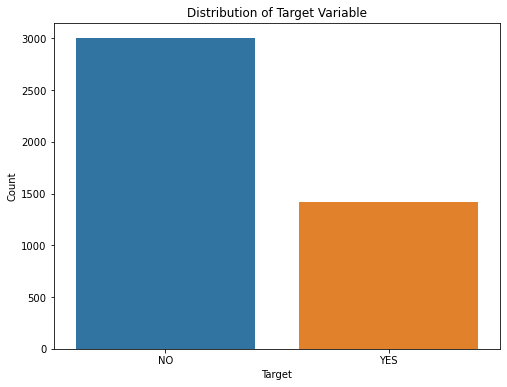

In [7]:
target_counts = df_school['Target'].value_counts()

# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['NO', 'YES'])  # Ensure that x-ticks correspond to 'NO' and 'YES'
plt.show()

In [8]:


column_mapping = {
    'Marital status': 'MaritalStat',
    'Application mode': 'AppMode',
    'Application order': 'AppOrder',
    'Course': 'Course',
    'Daytime/evening attendance': 'DayEveningAtt',
    'Previous qualification': 'PrevQual',
    'Nacionality': 'Nationality',  
    "Mother's qualification": 'MotherQual',
    "Father's qualification": 'FatherQual',
    "Mother's occupation": 'MotherOcc',
    "Father's occupation": 'FatherOcc',
    'Displaced': 'Displaced',
    'Educational special needs': 'EduNeeds',
    'Debtor': 'Debtor',
    'Tuition fees up to date': 'FeesUpdated',
    'Gender': 'Gender',
    'Scholarship holder': 'Scholarship',
    'Age at enrollment': 'AgeEnroll',
    'International': 'International',
    'Curricular units 1st sem (credited)': 'CU1Credited',
    'Curricular units 1st sem (enrolled)': 'CU1Enrolled',
    'Curricular units 1st sem (evaluations)': 'CU1Evaluations',
    'Curricular units 1st sem (approved)': 'CU1Approved',
    'Curricular units 1st sem (grade)': 'CU1Grade',
    'Curricular units 1st sem (without evaluations)': 'CU1NoEvals',
    'Curricular units 2nd sem (credited)': 'CU2Credited',
    'Curricular units 2nd sem (enrolled)': 'CU2Enrolled',
    'Curricular units 2nd sem (evaluations)': 'CU2Evaluations',
    'Curricular units 2nd sem (approved)': 'CU2Approved',
    'Curricular units 2nd sem (grade)': 'CU2Grade',
    'Curricular units 2nd sem (without evaluations)': 'CU2NoEvals',
    'Unemployment rate': 'UnempRate',
    'Inflation rate': 'InflationRate',
    'GDP': 'GDP',
    'Target': 'Target'
}



df_school.rename(columns=column_mapping, inplace=True)


In [9]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MaritalStat     4424 non-null   int64  
 1   AppMode         4424 non-null   int64  
 2   AppOrder        4424 non-null   int64  
 3   Course          4424 non-null   int64  
 4   DayEveningAtt   4424 non-null   int64  
 5   PrevQual        4424 non-null   int64  
 6   Nationality     4424 non-null   int64  
 7   MotherQual      4424 non-null   int64  
 8   FatherQual      4424 non-null   int64  
 9   MotherOcc       4424 non-null   int64  
 10  FatherOcc       4424 non-null   int64  
 11  Displaced       4424 non-null   int64  
 12  EduNeeds        4424 non-null   int64  
 13  Debtor          4424 non-null   int64  
 14  FeesUpdated     4424 non-null   int64  
 15  Gender          4424 non-null   int64  
 16  Scholarship     4424 non-null   int64  
 17  AgeEnroll       4424 non-null   i

In [10]:
# Gender replacement
gender_replace = {
    1: 'male',
    0: 'female'
}
df_school['Gender'] = df_school['Gender'].replace(gender_replace)

# Nationality replacement
nationality_replace = {
    1: 'Portuguese', 2: 'German', 3: 'Spanish', 4: 'Italian', 5: 'Dutch', 6: 'English',
    7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean', 10: 'Guinean', 11: 'Mozambican',
    12: 'Santomean', 13: 'Turkish', 14: 'Brazilian', 15: 'Romanian', 16: 'Moldova (Republic of)',
    17: 'Mexican', 18: 'Ukrainian', 19: 'Russian', 20: 'Cuban', 21: 'Colombian'
}
df_school['Nationality'] = df_school['Nationality'].replace(nationality_replace)

In [11]:
# Replace the values in 'Marital status'
marital_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

df_school['MaritalStat'] = df_school['MaritalStat'].replace(marital_mapping)


In [12]:
qualification_mapping = {
    1: 'Secondary Education',
    2: 'Higher Education - Undergraduate',
    3: 'Higher Education - Undergraduate',
    4: 'Higher Education - Graduate',
    5: 'Higher Education - Graduate',
    6: 'Higher Education - Undergraduate',
    7: 'Primary Education',
    8: 'Primary Education',
    9: 'Primary Education',
    10: 'Secondary Education',
    11: 'Secondary Education',
    12: 'Secondary Education',
    13: 'Secondary Education',
    14: 'Secondary Education',
    15: 'Secondary Education',
    16: 'Vocational/Technical',
    17: 'Secondary Education',
    18: 'Primary Education',
    19: 'Secondary Education',
    20: 'Primary Education',
    21: 'Primary Education',
    22: 'Secondary Education',
    23: 'Secondary Education',
    24: 'Unknown',
    25: 'Primary Education',
    26: 'Primary Education',
    27: 'Primary Education',
    28: 'Primary Education',
    29: 'Vocational/Technical',
    30: 'Higher Education - Undergraduate',
    31: 'Higher Education - Undergraduate',
    32: 'Higher Education - Undergraduate',
    33: 'Higher Education - Graduate',
    34: 'Higher Education - Graduate'
}

# Grouping the qualification categories
grouped_qualifications = {
    'Primary Education': 'Primary Education',
    'Secondary Education': 'Secondary Education',
    'Higher Education - Undergraduate': 'Higher Education',
    'Higher Education - Graduate': 'Higher Education',
    'Vocational/Technical': 'Vocational/Technical',
    'Unknown': 'Unknown'
}


df_school["FatherQual"] = df_school["FatherQual"].map(qualification_mapping)
df_school["FatherQual"] = df_school["FatherQual"].replace(grouped_qualifications)

df_school["MotherQual"] = df_school["MotherQual"].map(qualification_mapping)
df_school["MotherQual"] = df_school["MotherQual"].replace(grouped_qualifications)


In [13]:
# Mapping courses
course_mapping = {
    1: 'Biofuel Production Technologies',
    2: 'Animation and Multimedia Design',
    3: 'Social Service (evening attendance)',
    4: 'Agronomy',
    5: 'Communication Design',
    6: 'Veterinary Nursing',
    7: 'Informatics Engineering',
    8: 'Equiniculture',
    9: 'Management',
    10: 'Social Service',
    11: 'Tourism',
    12: 'Nursing',
    13: 'Oral Hygiene',
    14: 'Advertising and Marketing Management',
    15: 'Journalism and Communication',
    16: 'Basic Education',
    17: 'Management (evening attendance)'
}

# Define a new mapping from course names to broader categories
new_course_mapping = {
    'Biofuel Production Technologies': 'Science and Technology',
    'Animation and Multimedia Design': 'Arts, Design, and Social Sciences',
    'Social Service (evening attendance)': 'Arts, Design, and Social Sciences',
    'Agronomy': 'Science and Technology',
    'Communication Design': 'Arts, Design, and Social Sciences',
    'Veterinary Nursing': 'Health, Business, and Management',
    'Informatics Engineering': 'Science and Technology',
    'Equiniculture': 'Arts, Design, and Social Sciences',
    'Management': 'Health, Business, and Management',
    'Social Service': 'Arts, Design, and Social Sciences',
    'Tourism': 'Arts, Design, and Social Sciences',
    'Nursing': 'Health, Business, and Management',
    'Oral Hygiene': 'Health, Business, and Management',
    'Advertising and Marketing Management': 'Health, Business, and Management',
    'Journalism and Communication': 'Arts, Design, and Social Sciences',
    'Basic Education': 'Arts, Design, and Social Sciences',
    'Management (evening attendance)': 'Health, Business, and Management'
}

# First map the course IDs to names, then map names to broader categories
df_school['Course'] = df_school['Course'].map(course_mapping)
df_school['Course'] = df_school['Course'].map(new_course_mapping)


In [14]:
# Mapping 'Daytime/evening attendance' column
df_school['DayEveningAtt'] = df_school['DayEveningAtt'].replace({1: 'daytime', 0: 'evening'})


In [15]:
df_school['PrevQual'].unique()

array([ 1, 12, 16, 14,  8,  3, 15,  2,  4,  9, 17, 11,  6,  7, 13,  5, 10])

In [16]:
prev_qual_mapping = {
    1: 'Secondary Education',
    12: 'Basic Education',
    16: 'Higher Education (Undergraduate)',
    14: 'Other or Vocational Training',
    8: 'Incomplete Secondary Education',
    3: 'Higher Education (Undergraduate)',
    15: 'Higher Education (Undergraduate)',
    2: 'Higher Education (Undergraduate)',
    4: 'Higher Education (Postgraduate)',
    9: 'Other or Vocational Training',
    17: 'Higher Education (Postgraduate)',
    11: 'Basic Education',
    6: 'Other or Vocational Training',
    7: 'Incomplete Secondary Education',
    13: 'Basic Education',
    5: 'Higher Education (Postgraduate)',
    10: 'Basic Education'
}

df_school['PrevQual'] = df_school['PrevQual'].map(prev_qual_mapping)


In [17]:
df_school['Scholarship'].unique()

array([0, 1])

In [18]:
# Map 0 to 'No' and 1 to 'Yes'
scholarship_mapping = {0: 'No', 1: 'Yes'}

# Apply the mapping to the 'Scholarship' column
df_school['Scholarship'] = df_school['Scholarship'].map(scholarship_mapping)


In [19]:
df_school['AppMode'].unique()

array([ 8,  6,  1, 12,  9, 17, 15, 16, 14,  4, 13,  7,  3,  2,  5, 18, 10,
       11])

In [20]:
app_mode_mapping = {
    1: 'General Admission', 8: 'General Admission', 9: 'General Admission', 12: 'General Admission',
    2: 'Special Contingents or Conditions', 3: 'Special Contingents or Conditions', 4: 'Special Contingents or Conditions', 
    5: 'Special Contingents or Conditions', 6: 'Special Contingents or Conditions', 7: 'Special Contingents or Conditions', 
    10: 'Special Contingents or Conditions', 11: 'Special Contingents or Conditions',
    13: 'Course/Institution Changes', 14: 'Course/Institution Changes', 15: 'Course/Institution Changes', 
    16: 'Course/Institution Changes', 17: 'Course/Institution Changes', 18: 'Course/Institution Changes'
}

df_school['AppMode'] = df_school['AppMode'].map(app_mode_mapping)


In [21]:
df_school['AppOrder'].unique()

array([5, 1, 2, 4, 3, 6, 9, 0])

In [22]:
df_school['MotherOcc'].unique()

array([ 6,  4, 10,  8,  5,  2, 16,  1,  7,  3, 12,  9, 20, 28, 13, 29, 23,
       32, 30, 18, 24, 19, 11, 21, 15, 27, 31, 14, 22, 17, 26, 25])

In [23]:
occ_mapping = {
    # Mapping for Highly Skilled or Professional Occupations
    1: 'Highly Skilled/Professional', 2: 'Highly Skilled/Professional', 3: 'Highly Skilled/Professional', 
    4: 'Highly Skilled/Professional', 5: 'Highly Skilled/Professional', 16: 'Highly Skilled/Professional', 
    20: 'Highly Skilled/Professional', 21: 'Highly Skilled/Professional', 19: 'Highly Skilled/Professional', 
    23: 'Highly Skilled/Professional', 24: 'Highly Skilled/Professional', 25: 'Highly Skilled/Professional', 
    26: 'Highly Skilled/Professional', 22: 'Highly Skilled/Professional', 17: 'Highly Skilled/Professional', 
    18: 'Highly Skilled/Professional', 29: 'Highly Skilled/Professional', 28: 'Highly Skilled/Professional', 
    27: 'Highly Skilled/Professional',

    # Mapping for Skilled or Semi-Skilled Occupations
    6: 'Skilled/Semi-Skilled', 7: 'Skilled/Semi-Skilled', 8: 'Skilled/Semi-Skilled', 
    9: 'Skilled/Semi-Skilled', 30: 'Skilled/Semi-Skilled', 31: 'Skilled/Semi-Skilled', 
    32: 'Skilled/Semi-Skilled', 33: 'Skilled/Semi-Skilled', 34: 'Skilled/Semi-Skilled', 
    36: 'Skilled/Semi-Skilled', 37: 'Skilled/Semi-Skilled', 38: 'Skilled/Semi-Skilled', 
    39: 'Skilled/Semi-Skilled', 40: 'Skilled/Semi-Skilled', 41: 'Skilled/Semi-Skilled', 
    42: 'Skilled/Semi-Skilled',

    # Mapping for Unskilled Occupations
    10: 'Unskilled', 12: 'Unskilled', 43: 'Unskilled', 
    44: 'Unskilled', 45: 'Unskilled', 46: 'Unskilled'
}

df_school['MotherOcc'] = df_school['MotherOcc'].map(occ_mapping)
# Example of mapping
df_school['FatherOcc'] = df_school['FatherOcc'].map(occ_mapping)


In [24]:
df_school['Displaced'].unique()

array([1, 0])

In [25]:
# Map 0 to 'No' and 1 to 'Yes'
Displaced_mapping = {0: 'No', 1: 'Yes'}

# Apply the mapping to the 'Scholarship' column
df_school['Displaced'] = df_school['Displaced'].map(Displaced_mapping)


In [26]:
df_school['EduNeeds'].unique() 

array([0, 1])

In [27]:
# Map 0 to 'No' and 1 to 'Yes'
EduNeeds_mapping = {0: 'No', 1: 'Yes'}

# Apply the mapping to the 'Scholarship' column
df_school['EduNeeds'] = df_school['EduNeeds'].map(EduNeeds_mapping)


In [28]:
df_school['Debtor'].unique() 

array([0, 1])

In [29]:
# Map 0 to 'No' and 1 to 'Yes'
Debtor_mapping = {0: 'No', 1: 'Yes'}

# Apply the mapping to the 'Scholarship' column
df_school['Debtor'] = df_school['Debtor'].map(Debtor_mapping)


In [30]:
df_school['FeesUpdated'].unique() 

array([1, 0])

In [31]:
# Map 0 to 'No' and 1 to 'Yes'
FeesUpdated_mapping = {0: 'No', 1: 'Yes'}

# Apply the mapping to the 'Scholarship' column
df_school['FeesUpdated'] = df_school['FeesUpdated'].map(FeesUpdated_mapping)


In [32]:
df_school['International'].unique() 

array([0, 1])

In [33]:
# Map 0 to 'No' and 1 to 'Yes'
International_mapping = {0: 'No', 1: 'Yes'}

# Apply the mapping to the 'Scholarship' column
df_school['International'] = df_school['International'].map(International_mapping)


In [34]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MaritalStat     4424 non-null   object 
 1   AppMode         4424 non-null   object 
 2   AppOrder        4424 non-null   int64  
 3   Course          4424 non-null   object 
 4   DayEveningAtt   4424 non-null   object 
 5   PrevQual        4424 non-null   object 
 6   Nationality     4424 non-null   object 
 7   MotherQual      4424 non-null   object 
 8   FatherQual      4424 non-null   object 
 9   MotherOcc       4394 non-null   object 
 10  FatherOcc       4131 non-null   object 
 11  Displaced       4424 non-null   object 
 12  EduNeeds        4424 non-null   object 
 13  Debtor          4424 non-null   object 
 14  FeesUpdated     4424 non-null   object 
 15  Gender          4424 non-null   object 
 16  Scholarship     4424 non-null   object 
 17  AgeEnroll       4424 non-null   i

In [35]:
df_school.head()

,MaritalStat,AppMode,AppOrder,Course,DayEveningAtt,PrevQual,Nationality,MotherQual,FatherQual,MotherOcc,...,CU2Credited,CU2Enrolled,CU2Evaluations,CU2Approved,CU2Grade,CU2NoEvals,UnempRate,InflationRate,GDP,Target
0,Single,General Admission,5,"Arts, Design, and Social Sciences",daytime,Secondary Education,Portuguese,Secondary Education,Secondary Education,Skilled/Semi-Skilled,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,Single,Special Contingents or Conditions,1,"Arts, Design, and Social Sciences",daytime,Secondary Education,Portuguese,Secondary Education,Higher Education,Highly Skilled/Professional,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,Single,General Admission,5,"Arts, Design, and Social Sciences",daytime,Secondary Education,Portuguese,Secondary Education,Primary Education,Unskilled,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,Single,General Admission,2,"Arts, Design, and Social Sciences",daytime,Secondary Education,Portuguese,Secondary Education,Primary Education,Skilled/Semi-Skilled,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,Married,General Admission,1,"Arts, Design, and Social Sciences",evening,Secondary Education,Portuguese,Secondary Education,Primary Education,Unskilled,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [36]:
### Ceck for Duplicates

In [37]:
# Get the initial number of rows
initial_row_count = df_school.shape[0]

# Remove duplicate rows from the DataFrame in place
df_school.drop_duplicates(inplace=True)

# Calculate the number of duplicated rows removed
duplicates_removed = initial_row_count - df_school.shape[0]

# Print the appropriate message based on the number of duplicates removed
if duplicates_removed == 0:
    print("There are no duplicated rows in the dataset.")
else:
    print(f"{duplicates_removed} duplicated rows were removed from the dataset.")


4 duplicated rows were removed from the dataset.


In [38]:
# Identify the numeric columns common to both 'test' and 'df_school' DataFrames
numeric_columns = list(set(df_school.select_dtypes(include='number').columns))

# Identify the categorical columns common to both 'test' and 'df_school' DataFrames
categorical_columns = list(set(df_school.select_dtypes(exclude='number').columns))

# Display the count and the list of numeric and categorical columns
print(f"There are {len(numeric_columns)} numeric columns: {numeric_columns}")
print(f"There are {len(categorical_columns)} categorical columns: {categorical_columns}")


There are 18 numeric columns: ['UnempRate', 'CU2Credited', 'GDP', 'CU2Evaluations', 'Target', 'CU1Credited', 'CU2NoEvals', 'AgeEnroll', 'CU1Evaluations', 'CU1Approved', 'CU1Enrolled', 'AppOrder', 'CU1Grade', 'CU2Approved', 'CU2Enrolled', 'CU2Grade', 'CU1NoEvals', 'InflationRate']
There are 17 categorical columns: ['EduNeeds', 'MaritalStat', 'Debtor', 'FeesUpdated', 'Nationality', 'FatherOcc', 'Gender', 'Course', 'Scholarship', 'MotherQual', 'FatherQual', 'Displaced', 'MotherOcc', 'International', 'AppMode', 'DayEveningAtt', 'PrevQual']


In [39]:
X = df_school[numeric_columns+categorical_columns]
y = df_school['Target'] 

In [40]:
# Use train_test_split with a random_state, and add stratify for Classification
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y )

X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((3536, 35), (3536,), (884, 35), (884,))

### Impute Missing Values

In [41]:
num_imputer = SimpleImputer(strategy="mean").fit(X_train[numeric_columns])
cat_imputer = SimpleImputer(strategy="most_frequent").fit(X_train[categorical_columns])
num_imputer.transform(X_train[numeric_columns])
X_train_num_imputed = pd.DataFrame(num_imputer.transform(X_train[numeric_columns]), columns=numeric_columns)
X_eval_num_imputed = pd.DataFrame(num_imputer.transform(X_eval[numeric_columns]), columns=numeric_columns)

X_train_cat_imputed = pd.DataFrame(cat_imputer.transform(X_train[categorical_columns]), columns=categorical_columns)
X_eval_cat_imputed = pd.DataFrame(cat_imputer.transform(X_eval[categorical_columns]), columns=categorical_columns)

X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
X_eval_imputed = pd.concat([X_eval_num_imputed, X_eval_cat_imputed], axis=1)


### Features Encoding

In [42]:

# Create the encoder instance with the specified parameters
encoder = OneHotEncoder(sparse=False, drop="first")

# Fit the encoder on the training and evaluation categorical data combined
encoder.fit(pd.concat([X_train_cat_imputed, X_eval_cat_imputed]))

# Get the new column names after one-hot encoding
cat_encoded_cols = encoder.get_feature_names_out().tolist()

# Function to apply the encoder transformation and return a DataFrame
def encode_categorical_data(encoder, data, columns):
    return pd.DataFrame(encoder.transform(data), columns=columns, index=data.index)

# Transform and encode categorical columns for training and evaluation sets
X_train_cat_encoded = encode_categorical_data(encoder, X_train_cat_imputed, cat_encoded_cols)
X_eval_cat_encoded = encode_categorical_data(encoder, X_eval_cat_imputed, cat_encoded_cols)


TypeError: __init__() got an unexpected keyword argument 'sparse'

### Features Scaling


In [ ]:
scaler = RobustScaler().fit(X_train_num_imputed)

X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num_imputed), columns=numeric_columns)
X_eval_num_scaled = pd.DataFrame(scaler.transform(X_eval_num_imputed), columns=numeric_columns)

X_train_ready = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_eval_ready = pd.concat([X_eval_num_scaled, X_eval_cat_encoded], axis=1)


In [ ]:
X_train_ready.head()

In [ ]:
X_eval_ready.head()

In [ ]:
## Machine Learning Modeling 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression()

# Train the Logistic Regression model using the training data
log_reg.fit(X_train_ready, y_train)

# Predict the target values for the evaluation set
y_eval_pred = log_reg.predict(X_eval_ready)

# Generate and print the classification report
print(classification_report(y_true=y_eval, y_pred=y_eval_pred))
